In [1]:
# ============================================================
# --- LIMPIADOR DE NOTICIAS FOMC CON FINBERT ---
# ============================================================

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd
from tqdm import tqdm

# ====================================================
# --- 1️⃣ Rutas ---
# ====================================================
ruta_origen = "../data/csv/noticias_con_sentimiento.csv"   # CSV con texto completo
ruta_destino = "../data/csv/fomc_sentiment_finbert_clean.csv"  # salida limpia

# ====================================================
# --- 2️⃣ Cargar CSV original ---
# ====================================================
df = pd.read_csv(ruta_origen)


c:\Users\josit\CUARTO CURSO\TFG\TFG_DEF\envproc1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.head(10)

,Date,Release Date,Type,Text,Sentiment_Score,Sentiment_Label
0,2025-05-07,2025-05-28,Minute,Minutes of the Federal Open Market Committee\n...,0.9999,positive
1,2025-05-07,2025-05-07,Statement,Although swings in net exports have affected t...,0.6249,positive
2,2025-03-19,2025-03-19,Statement,Recent indicators suggest that economic activi...,0.9306,positive
3,2025-03-19,2025-04-09,Minute,Minutes of the Federal Open Market Committee\n...,0.9998,positive
4,2025-01-29,2025-01-29,Statement,Recent indicators suggest that economic activi...,0.7717,positive
5,2025-01-29,2025-02-19,Minute,Minutes of the Federal Open Market Committee\n...,0.9999,positive
6,2024-12-18,2024-12-18,Statement,Recent indicators suggest that economic activi...,0.8922,positive
7,2024-12-18,2025-01-08,Minute,Minutes of the Federal Open Market Committee\n...,0.9999,positive
8,2024-11-07,2024-11-26,Minute,Minutes of the Federal Open Market Committee\n...,0.9999,positive
9,2024-11-07,2024-11-07,Statement,Recent indicators suggest that economic activi...,0.8922,positive


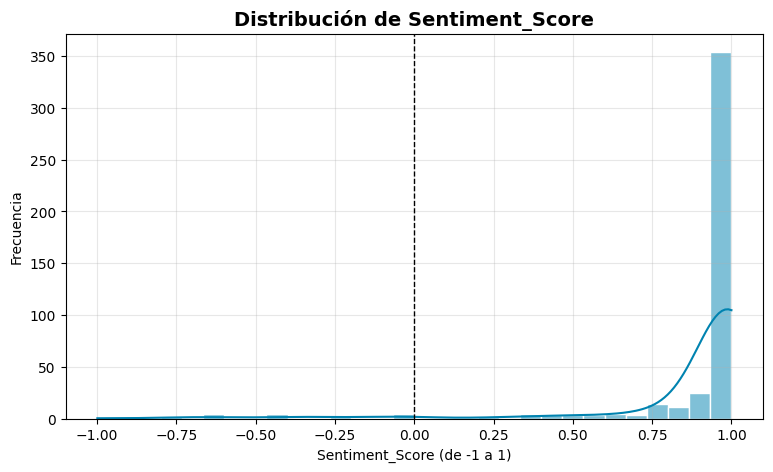

📊 Estadísticas básicas del Sentiment_Score:
count    448.000
mean       0.886
std        0.316
min       -0.999
25%        0.958
50%        0.999
75%        1.000
max        1.000
Name: Sentiment_Score, dtype: float64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# --- Distribución de Sentiment_Score ---
# ============================================================

# Aseguramos nombre correcto (minúsculas)
col_sent = [c for c in df.columns if "sentiment_score" in c.lower()][0]

plt.figure(figsize=(9,5))
sns.histplot(df[col_sent], bins=30, kde=True, color="#0083B0", edgecolor="white")

plt.title("Distribución de Sentiment_Score", fontsize=14, weight="bold")
plt.xlabel("Sentiment_Score (de -1 a 1)")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.show()

# Información complementaria
print("📊 Estadísticas básicas del Sentiment_Score:")
print(df[col_sent].describe().round(3))


In [5]:
print("Columnas:", df.columns.tolist())
print("Número de filas:", len(df))
df.head(3)


Columnas: ['Date', 'Release Date', 'Type', 'Text', 'Sentiment_Score', 'Sentiment_Label']
Número de filas: 448


,Date,Release Date,Type,Text,Sentiment_Score,Sentiment_Label
0,2025-05-07,2025-05-28,Minute,Minutes of the Federal Open Market Committee\n...,0.9999,positive
1,2025-05-07,2025-05-07,Statement,Although swings in net exports have affected t...,0.6249,positive
2,2025-03-19,2025-03-19,Statement,Recent indicators suggest that economic activi...,0.9306,positive


In [5]:
import pandas as pd
from datetime import datetime

# ============================================================
# --- 1️⃣ Cargar CSV original con sentimiento ---
# ============================================================
ruta_origen = r"C:\Users\josit\CUARTO CURSO\TFG\TFG_DEF\data\csv\noticias_con_sentimiento.csv"
df = pd.read_csv(ruta_origen)

# Normalizar nombres por si acaso
df.columns = [c.strip().lower() for c in df.columns]

# Detectar columna de fecha (release_date o release date)
fecha_cols = [c for c in df.columns if "release" in c and "date" in c]
if not fecha_cols:
    raise ValueError("❌ No se encontró ninguna columna de fecha en el CSV de noticias.")
fecha_col = fecha_cols[0]

# Convertir a datetime
df[fecha_col] = pd.to_datetime(df[fecha_col], errors="coerce")
df = df.dropna(subset=[fecha_col]).copy()
df["fuente"] = "FOMC real"

print("✅ Columna de fecha detectada:", fecha_col)
print(df.head())

# ============================================================
# --- 2️⃣ Crear lista de eventos históricos artificiales ---
# ============================================================
eventos = [
    {"release_date": datetime(2000, 3, 10), "Sentiment_Value": -0.7, "Evento": "Pinchazo burbuja punto-com"},
    {"release_date": datetime(2001, 9, 11), "Sentiment_Value": -1.0, "Evento": "Atentados del 11-S"},
    {"release_date": datetime(2002, 10, 9), "Sentiment_Value": -0.6, "Evento": "Crisis argentina y contagio a emergentes"},
    {"release_date": datetime(2003, 3, 20), "Sentiment_Value": -0.8, "Evento": "Inicio guerra de Irak"},
    {"release_date": datetime(2007, 8, 9),  "Sentiment_Value": -0.9, "Evento": "Mercado de crédito congelado – BNP Paribas alerta"},
    {"release_date": datetime(2008, 3, 16), "Sentiment_Value": -1.0, "Evento": "Caída de Bear Stearns – inicio crisis subprime"},
    {"release_date": datetime(2008, 9, 15), "Sentiment_Value": -1.0, "Evento": "Quiebra de Lehman Brothers"},
    {"release_date": datetime(2009, 1, 26), "Sentiment_Value": -0.9, "Evento": "Máximo desempleo en EE.UU. durante la crisis"},
    {"release_date": datetime(2010, 5, 6),  "Sentiment_Value": -0.7, "Evento": "Flash Crash en Wall Street"},
    {"release_date": datetime(2011, 8, 8),  "Sentiment_Value": -0.8, "Evento": "EE.UU. pierde calificación AAA"},
    {"release_date": datetime(2012, 4, 30), "Sentiment_Value": -0.9, "Evento": "España en doble recesión – impacto eurozona"},
    {"release_date": datetime(2012, 6, 9),  "Sentiment_Value": -0.7, "Evento": "Crisis de deuda en España – rescate bancario"},
    {"release_date": datetime(2015, 8, 24), "Sentiment_Value": -0.7, "Evento": "Colapso bursátil global – crisis China agosto 2015"},
    {"release_date": datetime(2019, 12, 15), "Sentiment_Value": -0.8, "Evento": "Miedo a recesión global – tensiones comerciales"},
    {"release_date": datetime(2020, 3, 16), "Sentiment_Value": -1.0, "Evento": "Crash global por COVID-19"},
    {"release_date": datetime(2020, 4, 20), "Sentiment_Value": -0.9, "Evento": "Precio del petróleo cae a negativo por primera vez"},
    {"release_date": datetime(2022, 2, 24), "Sentiment_Value": -0.9, "Evento": "Inicio guerra Rusia-Ucrania"},
    {"release_date": datetime(2022, 10, 13), "Sentiment_Value": -0.8, "Evento": "Inflación récord en Europa – subidas agresivas BCE"},
    {"release_date": datetime(2023, 3, 10), "Sentiment_Value": -0.8, "Evento": "Colapso del Silicon Valley Bank"},
    {"release_date": datetime(2024, 11, 5), "Sentiment_Value": -0.8, "Evento": "Elecciones presidenciales polarizadas EE.UU. generan incertidumbre"}
]

df_eventos = pd.DataFrame(eventos)

# ============================================================
# --- 3️⃣ Calcular label y score coherentes ---
# ============================================================
def label_from_value(v, thr=0.05):
    if v > thr:
        return "positive"
    elif v < -thr:
        return "negative"
    else:
        return "neutral"

def score_from_value(v):
    return abs(round(float(v), 4))

df_eventos["sentiment_label"] = df_eventos["Sentiment_Value"].apply(label_from_value)
df_eventos["sentiment_score"] = df_eventos["Sentiment_Value"].apply(score_from_value)
df_eventos["fuente"] = "Histórico artificial"

# ============================================================
# --- 4️⃣ Unificar estructura ---
# ============================================================
columnas_finales = [
    "release_date", "sentiment_label", "sentiment_score",
    "fuente", "Sentiment_Value", "Evento"
]

# Unificamos con el original
df_extendido = pd.concat([df, df_eventos[columnas_finales]], ignore_index=True)
df_extendido = df_extendido.sort_values("release_date").reset_index(drop=True)

# ============================================================
# --- 5️⃣ Guardar CSV final extendido ---
# ============================================================
ruta_guardado = r"C:\Users\josit\CUARTO CURSO\TFG\TFG_DEF\data\csv\noticias_con_sentimiento_mejorado.csv"
df_extendido.to_csv(ruta_guardado, index=False)

print(f"✅ Dataset extendido correctamente con eventos 2000–2025 guardado en:\n{ruta_guardado}")
print("\n📊 Vista previa:")
print(df_extendido.tail(10))


✅ Columna de fecha detectada: release date
         date release date       type  \
0  2025-05-07   2025-05-28     Minute   
1  2025-05-07   2025-05-07  Statement   
2  2025-03-19   2025-03-19  Statement   
3  2025-03-19   2025-04-09     Minute   
4  2025-01-29   2025-01-29  Statement   

                                                text  sentiment_score  \
0  Minutes of the Federal Open Market Committee\n...           0.9999   
1  Although swings in net exports have affected t...           0.6249   
2  Recent indicators suggest that economic activi...           0.9306   
3  Minutes of the Federal Open Market Committee\n...           0.9998   
4  Recent indicators suggest that economic activi...           0.7717   

  sentiment_label     fuente  
0        positive  FOMC real  
1        positive  FOMC real  
2        positive  FOMC real  
3        positive  FOMC real  
4        positive  FOMC real  
✅ Dataset extendido correctamente con eventos 2000–2025 guardado en:
C:\Users\josit\C

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime

# ============================================================
# --- 1️⃣ Cargar CSV original con sentimiento ---
# ============================================================
ruta_origen = r"C:\Users\josit\CUARTO CURSO\TFG\TFG_DEF\data\csv\noticias_con_sentimiento.csv"
df = pd.read_csv(ruta_origen)

# Normalizar nombres
df.columns = [c.strip().lower() for c in df.columns]

# Detectar columna de fecha
fecha_cols = [c for c in df.columns if "release" in c and "date" in c]
if not fecha_cols:
    raise ValueError("❌ No se encontró ninguna columna de fecha en el CSV.")
fecha_col = fecha_cols[0]

# Convertir a datetime
df[fecha_col] = pd.to_datetime(df[fecha_col], errors="coerce")
df = df.dropna(subset=[fecha_col]).copy()

# ============================================================
# --- 2️⃣ Calcular Sentiment_Value continuo ---
# ============================================================
def calcular_sentiment_value(label, score):
    """Genera valor continuo entre -1 y 1 según el label y score."""
    if isinstance(label, str):
        label = label.lower().strip()
    else:
        return 0

    if label == "positive":
        return round(float(score), 3)
    elif label == "negative":
        return -round(float(score), 3)
    else:  # neutral → valor muy pequeño cercano a 0
        ruido = np.random.uniform(-0.05, 0.05)
        return round(float(ruido), 3)

df["sentiment_value"] = df.apply(
    lambda r: calcular_sentiment_value(
        r.get("sentiment_label", ""), r.get("sentiment_score", 0)
    ),
    axis=1
)

# ============================================================
# --- 3️⃣ Crear eventos artificiales negativos ---
# ============================================================
eventos = [
    {"release_date": datetime(2000, 3, 10), "sentiment_value": -0.7},
    {"release_date": datetime(2001, 9, 11), "sentiment_value": -1.0},
    {"release_date": datetime(2002, 10, 9), "sentiment_value": -0.6},
    {"release_date": datetime(2003, 3, 20), "sentiment_value": -0.8},
    {"release_date": datetime(2007, 8, 9),  "sentiment_value": -0.9},
    {"release_date": datetime(2008, 3, 16), "sentiment_value": -1.0},
    {"release_date": datetime(2008, 9, 15), "sentiment_value": -1.0},
    {"release_date": datetime(2009, 1, 26), "sentiment_value": -0.9},
    {"release_date": datetime(2010, 5, 6),  "sentiment_value": -0.7},
    {"release_date": datetime(2011, 8, 8),  "sentiment_value": -0.8},
    {"release_date": datetime(2012, 4, 30), "sentiment_value": -0.9},
    {"release_date": datetime(2012, 6, 9),  "sentiment_value": -0.7},
    {"release_date": datetime(2015, 8, 24), "sentiment_value": -0.7},
    {"release_date": datetime(2019, 12, 15), "sentiment_value": -0.8},
    {"release_date": datetime(2020, 3, 16), "sentiment_value": -1.0},
    {"release_date": datetime(2020, 4, 20), "sentiment_value": -0.9},
    {"release_date": datetime(2022, 2, 24), "sentiment_value": -0.9},
    {"release_date": datetime(2022, 10, 13), "sentiment_value": -0.8},
    {"release_date": datetime(2023, 3, 10), "sentiment_value": -0.8},
    {"release_date": datetime(2024, 11, 5), "sentiment_value": -0.8}
]

df_eventos = pd.DataFrame(eventos)

# ============================================================
# --- 4️⃣ Unificar (asegurando columnas iguales) ---
# ============================================================
# Renombrar columnas para que coincidan exactamente
df_eventos = df_eventos.rename(columns={"release_date": fecha_col})
df_eventos = df_eventos[[fecha_col, "sentiment_value"]]

df_final = pd.concat(
    [df[[fecha_col, "sentiment_value"]], df_eventos],
    ignore_index=True
).sort_values(by=fecha_col).reset_index(drop=True)

# ============================================================
# --- 5️⃣ Guardar CSV simplificado ---
# ============================================================
ruta_guardado = r"C:\Users\josit\CUARTO CURSO\TFG\TFG_DEF\data\csv\sentimiento_simplificado.csv"
df_final.to_csv(ruta_guardado, index=False)

print(f"✅ CSV simplificado generado correctamente en:\n{ruta_guardado}")
print("\n📊 Vista previa:")
print(df_final.head(10))

# ============================================================
# --- 6️⃣ Distribución resumen ---
# ============================================================
print("\n📈 Distribución de Sentiment_Value:")
print(df_final["sentiment_value"].describe())
print("\n✅ Valores únicos (signos):")
print(df_final["sentiment_value"].apply(lambda x: 'neg' if x < 0 else 'pos' if x > 0 else '0').value_counts())


✅ CSV simplificado generado correctamente en:
C:\Users\josit\CUARTO CURSO\TFG\TFG_DEF\data\csv\sentimiento_simplificado.csv

📊 Vista previa:
  release date  sentiment_value
0   2000-02-02            0.856
1   2000-03-10           -0.700
2   2000-03-21            0.778
3   2000-03-23            1.000
4   2000-05-16            0.888
5   2000-05-18            1.000
6   2000-06-28           -0.022
7   2000-06-29            1.000
8   2000-08-22            0.402
9   2000-08-24            1.000

📈 Distribución de Sentiment_Value:
count    439.000000
mean       0.837075
std        0.410967
min       -1.000000
25%        0.925500
50%        0.997000
75%        1.000000
max        1.000000
Name: sentiment_value, dtype: float64

✅ Valores únicos (signos):
sentiment_value
pos    415
neg     24
Name: count, dtype: int64


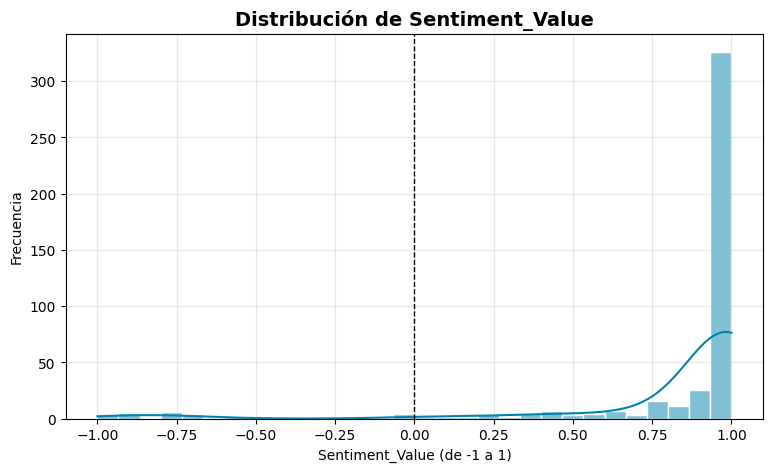

📊 Estadísticas básicas del Sentiment_Value:
count    439.000
mean       0.837
std        0.411
min       -1.000
25%        0.926
50%        0.997
75%        1.000
max        1.000
Name: sentiment_value, dtype: float64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# --- 1️⃣ Cargar CSV simplificado ---
# ============================================================
ruta_csv = r"C:\Users\josit\CUARTO CURSO\TFG\TFG_DEF\data\csv\sentimiento_simplificado.csv"
df = pd.read_csv(ruta_csv)

# Normalizar nombres por si acaso
df.columns = [c.strip().lower() for c in df.columns]

# Verificar columna de sentimiento
col_sent = [c for c in df.columns if "sentiment" in c][0]

# ============================================================
# --- 2️⃣ Graficar distribución ---
# ============================================================
plt.figure(figsize=(9, 5))
sns.histplot(df[col_sent], bins=30, kde=True, color="#0083B0", edgecolor="white")

plt.title("Distribución de Sentiment_Value", fontsize=14, weight="bold")
plt.xlabel("Sentiment_Value (de -1 a 1)")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.show()

# ============================================================
# --- 3️⃣ Mostrar estadísticas ---
# ============================================================
print("📊 Estadísticas básicas del Sentiment_Value:")
print(df[col_sent].describe().round(3))


In [15]:
df = pd.read_csv("../data/csv/sentimiento_simplificado.csv")

In [16]:
df.head(50)

,release date,sentiment_value
0,2000-02-02,0.856
1,2000-03-10,-0.700
2,2000-03-21,0.778
3,2000-03-23,1.000
4,2000-05-16,0.888
5,2000-05-18,1.000
6,2000-06-28,-0.022
7,2000-06-29,1.000
8,2000-08-22,0.402
9,2000-08-24,1.000


🔎 Antes del balanceo: {'negativos (<0)': 24, 'positivos (>0)': 415, 'min': -1.0, 'max': 1.0, 'total': 439}
🧹 Eliminadas 290 noticias con sentiment_value > 0.95
🔎 Después del balanceo: {'negativos (<0)': 24, 'positivos (>0)': 125, 'min': -1.0, 'max': 1.0, 'total': 149}
💾 Guardado en:
C:\Users\josit\CUARTO CURSO\TFG\TFG_DEF\data\csv\sentimiento_balanceado.csv


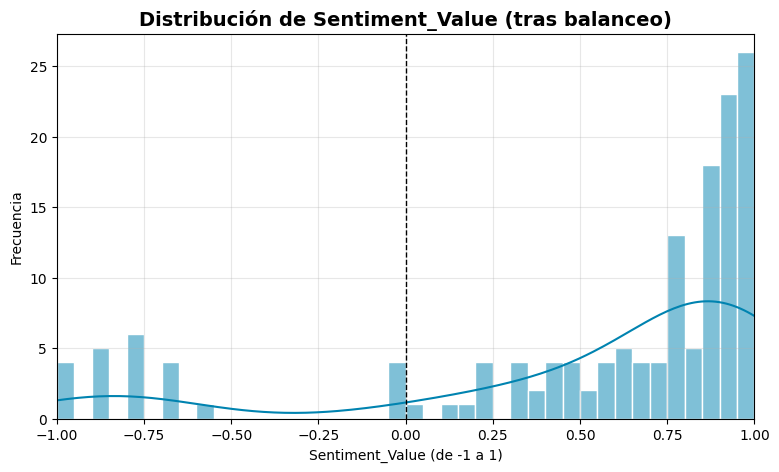

📊 Estadísticas básicas del nuevo Sentiment_Value:
count    149.000
mean       0.532
std        0.598
min       -1.000
25%        0.402
50%        0.784
75%        0.931
max        1.000
Name: sentiment_value, dtype: float64


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# 1️⃣ Cargar CSV y normalizar columnas
# ============================================================
ruta_original = r"C:\Users\josit\CUARTO CURSO\TFG\TFG_DEF\data\csv\sentimiento_simplificado.csv"
df = pd.read_csv(ruta_original)

df.columns = [c.strip().lower() for c in df.columns]
df = df.loc[:, ~df.columns.duplicated()].reset_index(drop=True)

# ============================================================
# 2️⃣ Asegurar 'sentiment_value' con signo
# ============================================================
col_value = next((c for c in df.columns if "sentiment_value" in c), None)
col_score = next((c for c in df.columns if "sentiment_score" in c), None)
col_label = next((c for c in df.columns if "sentiment_label" in c), None)

if col_value is None:
    if not (col_score and col_label):
        raise ValueError("❌ Falta 'sentiment_value' y no hay 'sentiment_score' + 'sentiment_label'.")
    print("⚙️  Creando 'sentiment_value' desde label/score...")
    df[col_label] = df[col_label].astype(str).str.lower()
    df["sentiment_value"] = df.apply(
        lambda r: r[col_score]
        if r[col_label] == "positive"
        else -r[col_score]
        if r[col_label] == "negative"
        else r[col_score] * np.random.uniform(-0.15, 0.15),  # neutrales cerca de 0
        axis=1
    )
    col_value = "sentiment_value"
else:
    df[col_value] = pd.to_numeric(df[col_value], errors="coerce").clip(-1, 1)

# ============================================================
# 3️⃣ Diagnóstico previo
# ============================================================
def resumen_signos(series):
    return {
        "negativos (<0)": int((series < 0).sum()),
        "positivos (>0)": int((series > 0).sum()),
        "min": float(series.min()),
        "max": float(series.max()),
        "total": len(series)
    }

print("🔎 Antes del balanceo:", resumen_signos(df[col_value]))

# ============================================================
# 4️⃣ Eliminar 50% de las noticias con Sentiment_Value > 0.95
# ============================================================
muy_positivas_idx = df.index[df[col_value] > 0.95]
num_a_eliminar = int(len(muy_positivas_idx) * 0.92)

if num_a_eliminar > 0:
    eliminar_idx = np.random.RandomState(42).choice(
        muy_positivas_idx, size=num_a_eliminar, replace=False
    )
    df_balanceado = df.drop(eliminar_idx).reset_index(drop=True)
else:
    df_balanceado = df.copy()

print(f"🧹 Eliminadas {num_a_eliminar} noticias con {col_value} > 0.95")
print("🔎 Después del balanceo:", resumen_signos(df_balanceado[col_value]))

# ============================================================
# 5️⃣ Guardar CSV balanceado
# ============================================================
ruta_guardado = r"C:\Users\josit\CUARTO CURSO\TFG\TFG_DEF\data\csv\sentimiento_balanceado.csv"
df_balanceado.to_csv(ruta_guardado, index=False)
print(f"💾 Guardado en:\n{ruta_guardado}")

# ============================================================
# 6️⃣ Gráfica de distribución (–1 a 1)
# ============================================================
plt.figure(figsize=(9, 5))
sns.histplot(df_balanceado[col_value], bins=40, kde=True, color="#0083B0", edgecolor="white")
plt.title("Distribución de Sentiment_Value (tras balanceo)", fontsize=14, weight="bold")
plt.xlabel("Sentiment_Value (de -1 a 1)")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlim(-1, 1)
plt.show()

# ============================================================
# 7️⃣ Estadísticas
# ============================================================
print("📊 Estadísticas básicas del nuevo Sentiment_Value:")
print(df_balanceado[col_value].describe().round(3))
